### 제 사진 대신, 레드벨벳 아이린을 기준으로 프로젝트 진행하였습니다. (아이린 닮은 아이돌 찾기로 변경)

### 얼굴 영역 자르기

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/아이린.jpeg'

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


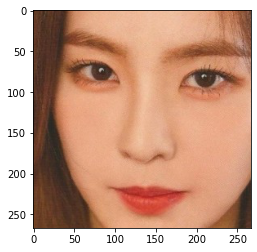

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face) 

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['정연.jpeg', '비니.jpg', '수영.jpeg', '신비.jpg', '제시카.jpeg', '효정.jpeg', '크리스탈.jpeg', '미나.jpeg', '채연.jpg', '리아.jpg', '권은비.jpeg', '은지.jpeg', '여자아이들수진.jpeg', '솔라.jpeg', '승희.jpeg', '문별.jpeg', '유리.jpg', '하영.jpeg', '도아.jpeg', '슬기.jpeg', '사쿠라.jpeg', '지수.jpeg', '나인뮤지스경리.jpg', '수지.jpeg', '청하.jpeg', '전소미.jpg', '예리.jpeg', '지효.jpeg', '혜리.jpeg', '유아.jpeg', '아린.jpeg', '레인보우재경.jpg', '잇지유나.jpg', '사나.jpeg', '태연.jpeg', '류진.jpg', '제니.jpeg', '아이린1.jpeg', '아이유.jpeg', '민니.jpg', '휘인.jpeg', '설현.jpeg', '다현.jpeg', '이효리.jpg', '안유진.jpeg', '아이즈원민주.jpg', '로제.jpg', '러블리즈예인.jpg', '티파니.jpg', '화사.jpeg', '웬디.jpeg', '리사.jpg', '효연.jpeg', '최유정.jpeg', '아이린.jpeg', '조이.jpeg', '윤아.jpeg', '우기.jpg', '잇지예지.jpeg', '트와이스모모.jpeg', '케이.jpg', '선미.jpeg', '나연.jpeg', '미미.jpg']


### 얼굴 영역의 임베딩 추출하기


In [4]:
image_file = os.path.join(dir_path, '아이린.jpeg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-1.05214201e-01,  1.13742121e-01,  3.58688235e-02, -9.75755528e-02,
        -1.32259756e-01, -8.47351179e-03, -5.83845079e-02, -1.10252410e-01,
         1.36227608e-01, -2.12950468e-01,  2.01638624e-01, -1.44478336e-01,
        -2.21927062e-01,  4.79530916e-02, -3.87378708e-02,  2.33386010e-01,
        -2.05057457e-01, -1.53914884e-01, -4.18439172e-02,  2.40622927e-03,
         8.02853703e-02,  4.48741056e-02, -3.43480110e-02,  9.18127671e-02,
        -6.47167936e-02, -3.17918509e-01, -1.26195282e-01, -4.85942550e-02,
        -9.15018376e-03, -9.05228108e-02, -5.09012416e-02, -9.68173612e-04,
        -1.76904708e-01, -1.08813252e-02, -9.39580519e-03,  1.06682815e-01,
        -7.37638166e-03, -1.09749414e-01,  1.50909543e-01, -2.66603455e-02,
        -2.70410568e-01,  1.00904539e-01,  9.45779011e-02,  2.43445560e-01,
         1.48469344e-01,  1.15736118e-02, -3.69401425e-02, -1.89821243e-01,
         9.07827690e-02, -1.48573637e-01,  4.17258777e-03,  8.03336278e-02,
         2.4

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['아이린']

array([-1.05214201e-01,  1.13742121e-01,  3.58688235e-02, -9.75755528e-02,
       -1.32259756e-01, -8.47351179e-03, -5.83845079e-02, -1.10252410e-01,
        1.36227608e-01, -2.12950468e-01,  2.01638624e-01, -1.44478336e-01,
       -2.21927062e-01,  4.79530916e-02, -3.87378708e-02,  2.33386010e-01,
       -2.05057457e-01, -1.53914884e-01, -4.18439172e-02,  2.40622927e-03,
        8.02853703e-02,  4.48741056e-02, -3.43480110e-02,  9.18127671e-02,
       -6.47167936e-02, -3.17918509e-01, -1.26195282e-01, -4.85942550e-02,
       -9.15018376e-03, -9.05228108e-02, -5.09012416e-02, -9.68173612e-04,
       -1.76904708e-01, -1.08813252e-02, -9.39580519e-03,  1.06682815e-01,
       -7.37638166e-03, -1.09749414e-01,  1.50909543e-01, -2.66603455e-02,
       -2.70410568e-01,  1.00904539e-01,  9.45779011e-02,  2.43445560e-01,
        1.48469344e-01,  1.15736118e-02, -3.69401425e-02, -1.89821243e-01,
        9.07827690e-02, -1.48573637e-01,  4.17258777e-03,  8.03336278e-02,
        2.48807073e-02,  

### 모은 연예인들과 비교하기


In [7]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [8]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [31]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top+1):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
#     return sorted_faces, sort_key_func

In [32]:
get_nearest_face('아이린')

순위 0  이름 : 아이린1  거리 : 0.33102928528332487
순위 1  이름 : 리아  거리 : 0.3630208957174815
순위 2  이름 : 웬디  거리 : 0.3676828608844779
순위 3  이름 : 아린  거리 : 0.3715954531792721
순위 4  이름 : 잇지예지  거리 : 0.37349015609040287
순위 5  이름 : 예리  거리 : 0.37429949563240056


### 결과

- 순위 0  이름 : 아이린1  거리 : 0.33102928528332487
- 순위 1  이름 : 리아  거리 : 0.3630208957174815
- 순위 2  이름 : 웬디  거리 : 0.3676828608844779
- 순위 3  이름 : 아린  거리 : 0.3715954531792721
- 순위 4  이름 : 잇지예지  거리 : 0.37349015609040287    
- 순위 5  이름 : 예리  거리 : 0.37429949563240056

아이린 다른 사진을 추가해서, 아이린 닮은 꼴로 아이린이 나올까 싶었는데, 아이린이 1위로 나온다. 신기..    
본인 사진 순위를 제외한 top5를 보기위해 순위0포함 6개 출력하였다.   

### 시각화 시도해 보기


In [21]:
from PIL import Image

irene = os.getenv('HOME')+'/aiffel/face_embedding/images/아이린.jpeg'
irene1 = os.getenv('HOME')+'/aiffel/face_embedding/images/아이린1.jpeg'
top1 = os.getenv('HOME')+'/aiffel/face_embedding/images/리아.jpg'
top2 = os.getenv('HOME')+'/aiffel/face_embedding/images/웬디.jpeg'
top3 = os.getenv('HOME')+'/aiffel/face_embedding/images/아린.jpeg'
top4 = os.getenv('HOME')+'/aiffel/face_embedding/images/잇지예지.jpeg'
top5 = os.getenv('HOME')+'/aiffel/face_embedding/images/예리.jpeg'

img_irene = Image.open(irene)
img_irene1 = Image.open(irene1)
img_top1 = Image.open(top1)
img_top2 = Image.open(top2)
img_top3 = Image.open(top3)
img_top4 = Image.open(top4)
img_top5 = Image.open(top5)

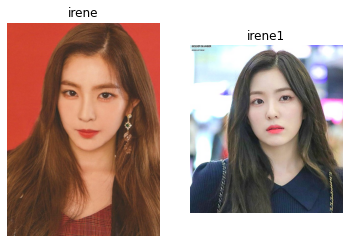

In [23]:
# 아이린 본인, 다른사진과 출력
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.axis("off")
plt.title("irene")
plt.imshow(img_irene)

plt.subplot(1,2,2)
plt.axis("off")
plt.title("irene1")
plt.imshow(img_irene1)
plt.show()


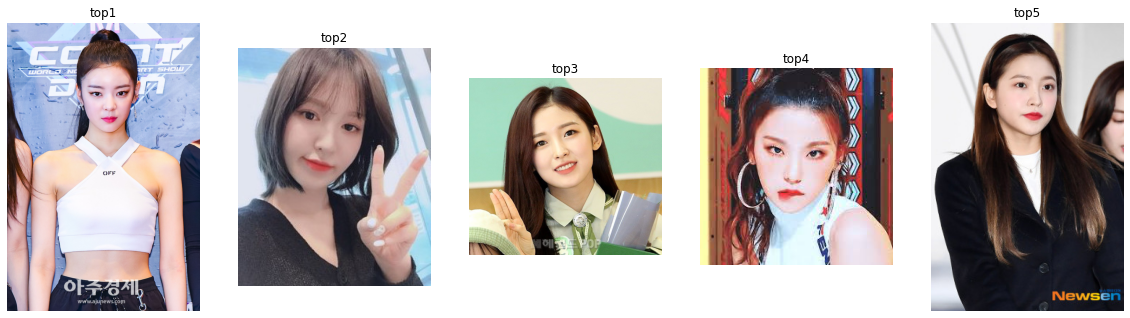

순위 0  이름 : 아이린1  거리 : 0.33102928528332487
순위 1  이름 : 리아  거리 : 0.3630208957174815
순위 2  이름 : 웬디  거리 : 0.3676828608844779
순위 3  이름 : 아린  거리 : 0.3715954531792721
순위 4  이름 : 잇지예지  거리 : 0.37349015609040287
순위 5  이름 : 예리  거리 : 0.37429949563240056


In [34]:
plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.axis("off")
plt.title("top1")
plt.imshow(img_top1)

plt.subplot(1,5,2)
plt.axis("off")
plt.title("top2")
plt.imshow(img_top2)

plt.subplot(1,5,3)
plt.axis("off")
plt.title("top3")
plt.imshow(img_top3)

plt.subplot(1,5,4)
plt.axis("off")
plt.title("top4")
plt.imshow(img_top4)

plt.subplot(1,5,5)
plt.axis("off")
plt.title("top5")
plt.imshow(img_top5)


plt.show()

get_nearest_face('아이린')

아이린이 속한 그룹(레드벨벳)멤버가 top5안에 두 명이 들어가서 신기했다. (top2:웬디, top5:예리)    
아이돌들 비슷하게 생겨서 누가 누군지 헷갈려서 구분하기 힘들었었는데, 비슷한 애들로 구성해서 그룹짓는 것 같다.    
Top1리아, Top4예지는 아이린 닮았다고 생각난 적 없었는데, 무대화장이 비슷해서 닮은 꼴로 인식한 것 같다.    

### 평가문항

- 닮은 꼴 순위, 이름, 임베딩 거리를 포함한 Top-5리스트가 정렬되어 출력되었다.   
- 다양한 탐색을 통해 임베딩 거리 0.5이내로 닮은 연예인을 찾아냈다.   
- matplotlib 시각화 도구를 하나 이상 이용해, 결과 시각화를 구현하였다.